# BIKE SHARING ASSIGNMENT BY SHUBHASHREE P

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

The solution is divided into the following sections: 
- Understanding the data and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


### 1.  Understanding data and exploration

import libraries and the required attributes.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Reading the dataset
BS_day = pd.read_csv("day.csv")

In [9]:
# Let's take a look at the first few rows
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Let's look at the number of rows and columns in the dataset
BS_day.shape

(730, 16)

In [12]:
# Understanding the feature names in the dataset
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
# Getting insights of the features
BS_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [14]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(BS_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [16]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
BS_day.loc[(BS_day['season'] == 1) , 'season'] = 'spring'

# 2=summer
BS_day.loc[(BS_day['season'] == 2) , 'season'] = 'summer'

# 3=fall
BS_day.loc[(BS_day['season'] == 3) , 'season'] = 'fall'

# 4=winter
BS_day.loc[(BS_day['season'] == 4) , 'season'] = 'winter'

In [18]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
BS_day['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [19]:
# year (0: 2018, 1:2019)
BS_day['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [20]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
BS_day[['mnth']] = BS_day[['mnth']].apply(object_map)

In [21]:
# Checking whether the conversion is done properly or not.datacount -  month
BS_day['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [22]:
# whether day is a holiday or not (0: No, 1: Yes)
BS_day['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [23]:
# Assigning string values to weekdays instead of numeric values, datacount -  weekdays
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
BS_day[['weekday']] = BS_day[['weekday']].apply(str_map)

In [24]:
# Checking whether the conversion is done properly or not, datacount -  weekdays
BS_day['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [25]:
# if the day is neither weekend nor a holiday then it takes the value 1 if it is any other value then it will be considered as 0
BS_day['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [26]:
# for better understanding the weathersit names which are too long are replaced.

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
BS_day.loc[(BS_day['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
BS_day.loc[(BS_day['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
BS_day.loc[(BS_day['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
BS_day.loc[(BS_day['weathersit'] == 4) , 'weathersit'] = 'D'

In [27]:
# Extracting the type of weather situations present in the data
BS_day['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [28]:
# Taking count based on weather situations
BS_day['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

### 2. Data Visualisation

- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, then it should be rectified.
using `matplotlib` and `seaborn`, the data in this assignment is visualised

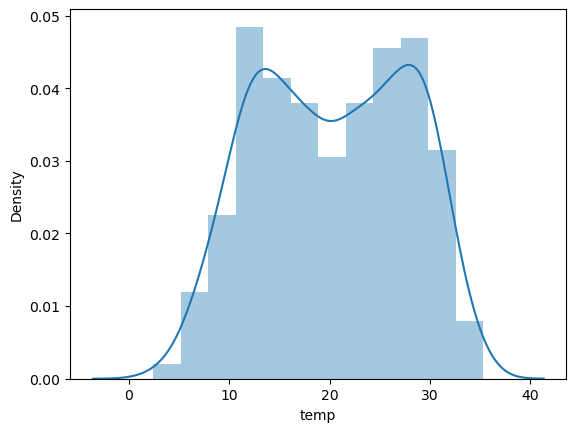

In [29]:
# temperature
sns.distplot(BS_day['temp'])
plt.show()

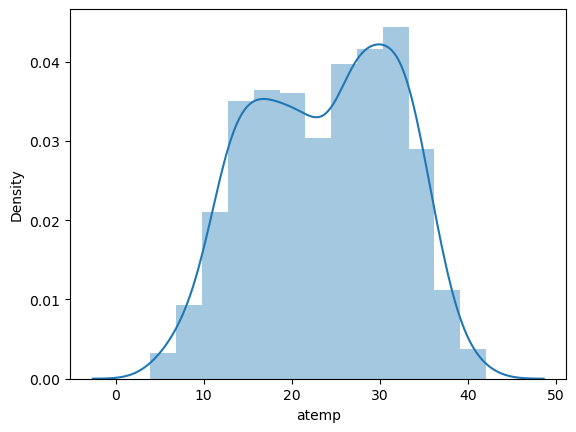

In [30]:
# feeling temperature
sns.distplot(BS_day['atemp'])
plt.show()

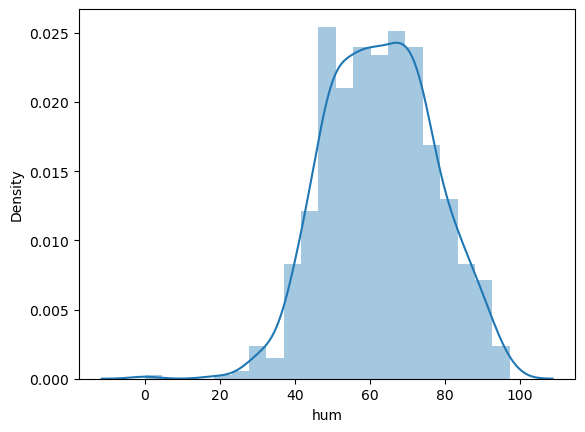

In [31]:
# humidity
sns.distplot(BS_day['hum'])
plt.show()

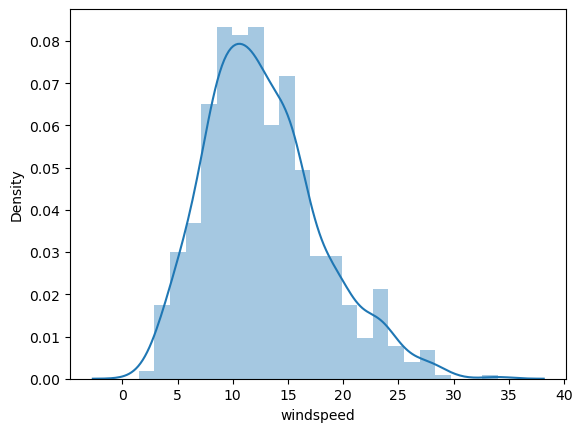

In [32]:
# wind speed
sns.distplot(BS_day['windspeed'])
plt.show()

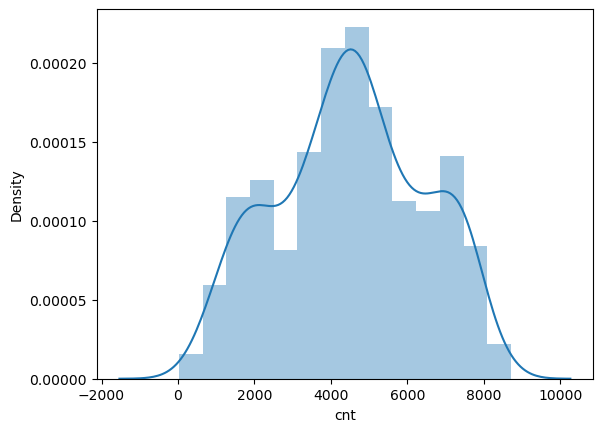

In [33]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(BS_day['cnt'])
plt.show()

In [34]:
# Converting date to datetime format
BS_day['dteday']=BS_day['dteday'].astype('datetime64')

In [35]:
# All categorical variables in the dataset
BS_day_categorical=BS_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [36]:
BS_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,Tues,A


#### Visualising Categorical Variables

There are some categorical values, so a boxplot is done.

<Axes: xlabel='weathersit', ylabel='cnt'>

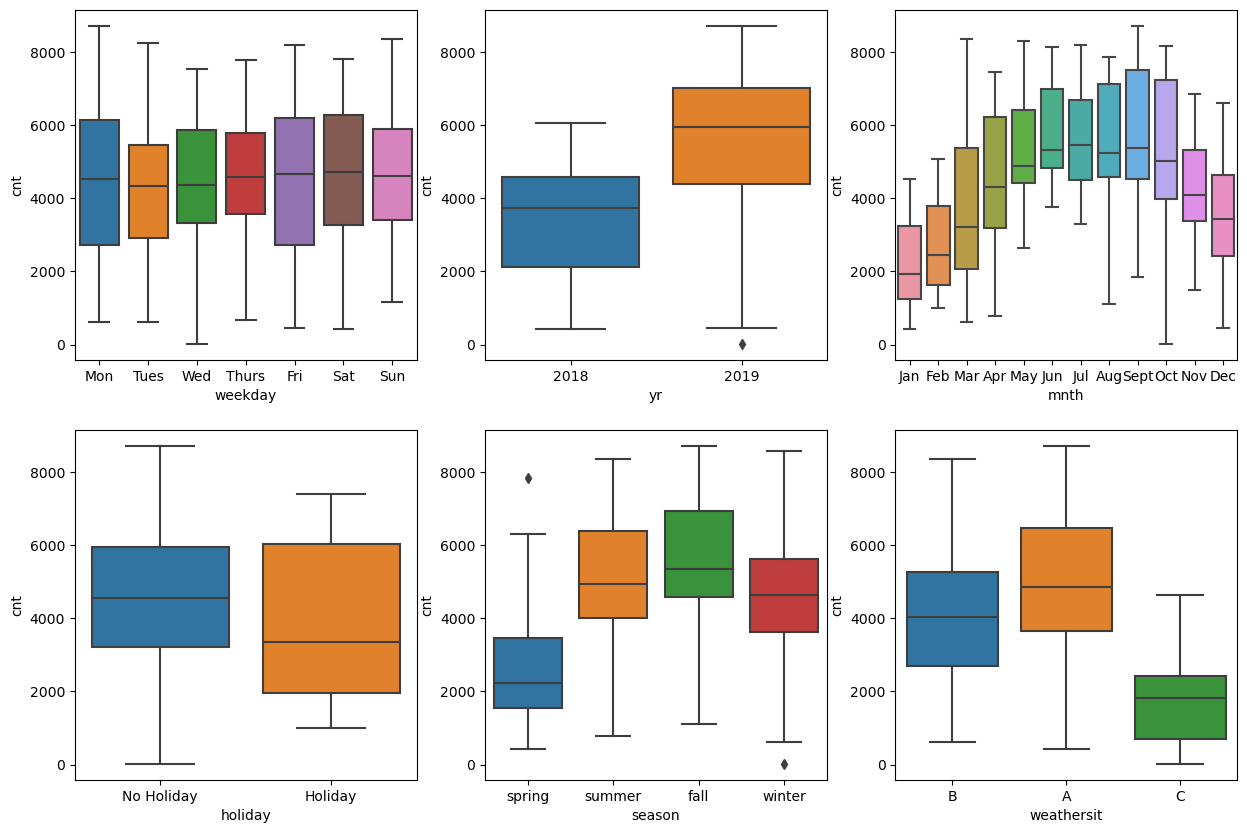

In [41]:

plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)


#### Visualising Numeric Variables

 pairplot of numeric variables is done;

In [53]:
# Converting "casual","registered" and "cnt" numeric variables to float datatype 

IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    BS_day[var] = BS_day[var].astype("float")


In [54]:
# All numeric variables in the dataset
BS_day_numeric = BS_day.select_dtypes(include=['float64'])
BS_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


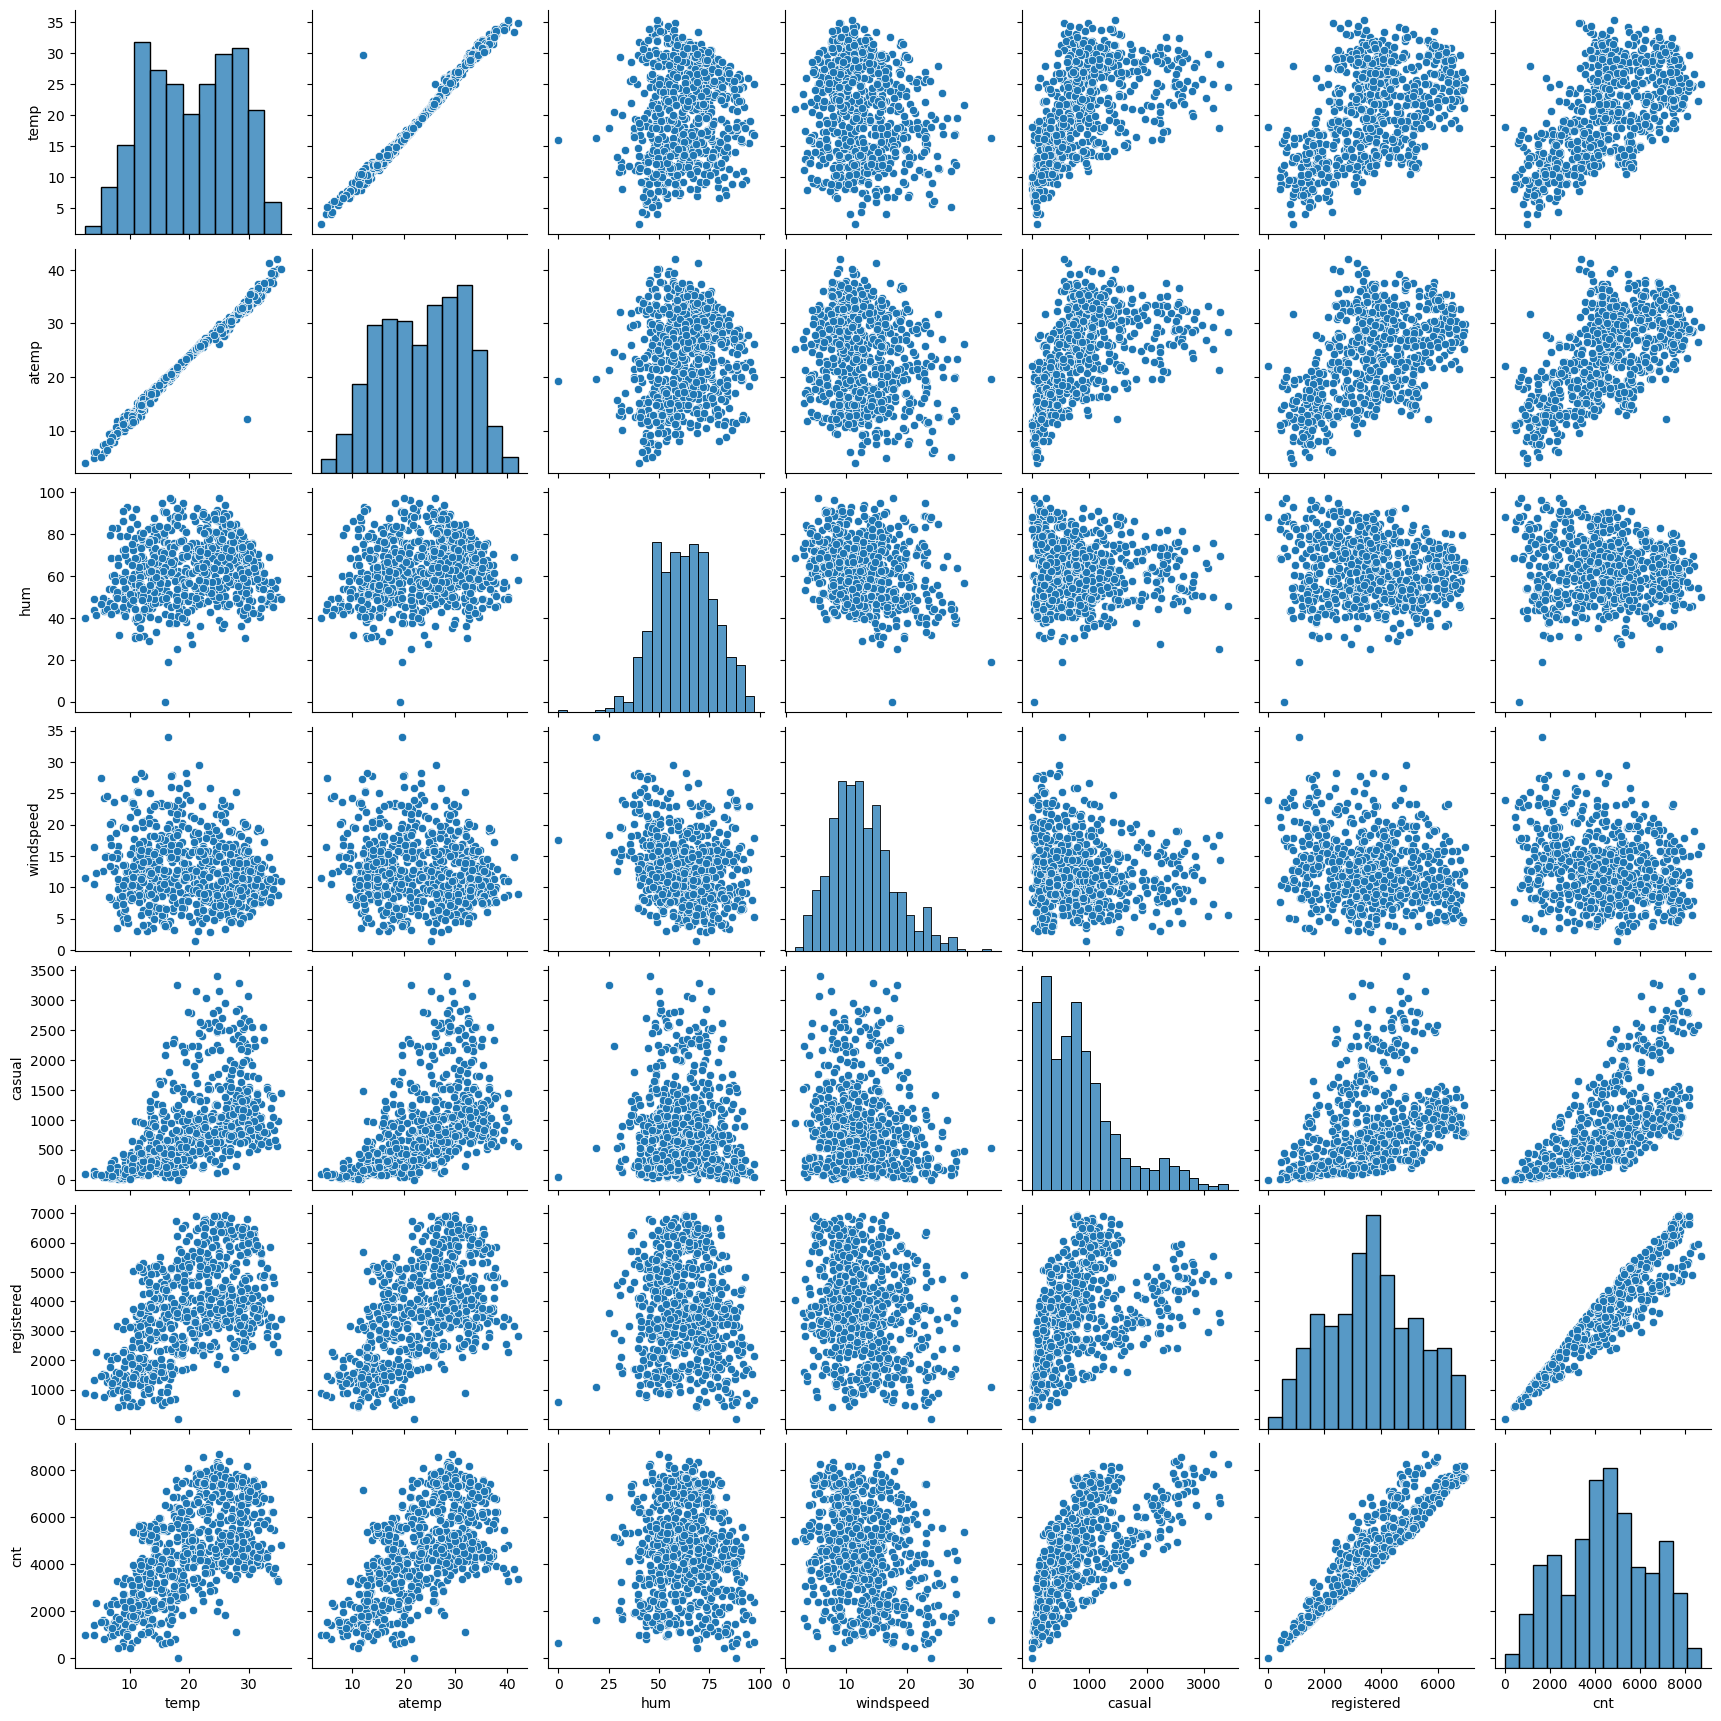

In [55]:
# Pairwise scatter plot
sns.pairplot(BS_day_numeric)
plt.show()

Correlation matrix for the same 

In [57]:
cor = BS_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


 heatmap 

<Axes: >

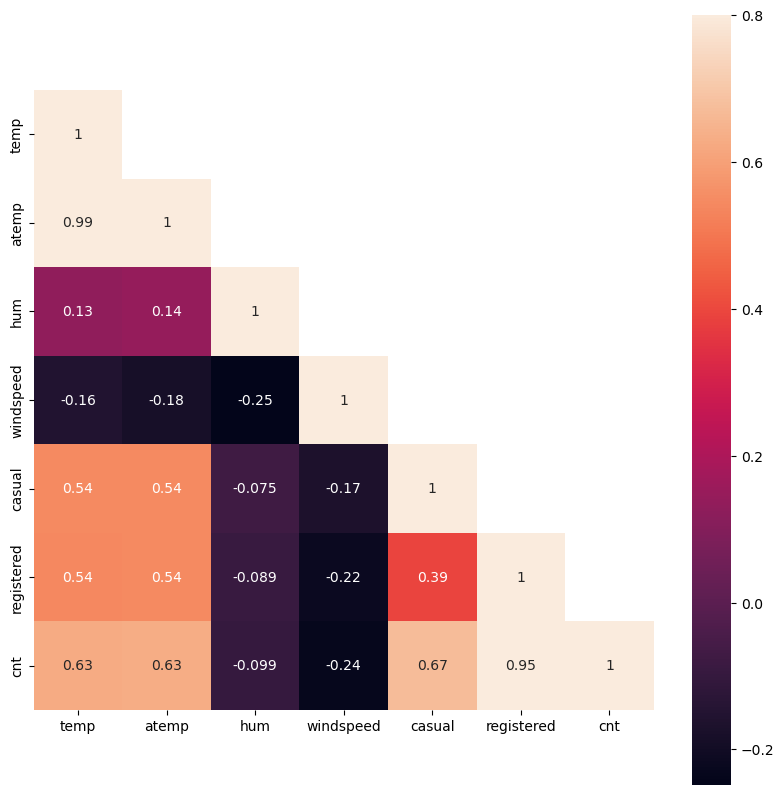

In [59]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

From the above heatmap, we can know that the

Correlation of Count('cnt') with independent variables:
- Count('cnt') is positevely(high) correlated with 'casual' and 'registered' : it is high with 'atemp'. Good sales can be expected.

- Count is negatively correlated to 'windspeed'. It means that the bike demand will likely to be less during windy days than the normmal days.

Correlation among independent variables:
- at the left side of top part of matrix, some of the independent variables are highly correlated, atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.



# visualizing the demand of shared bike in different seasons and holidays

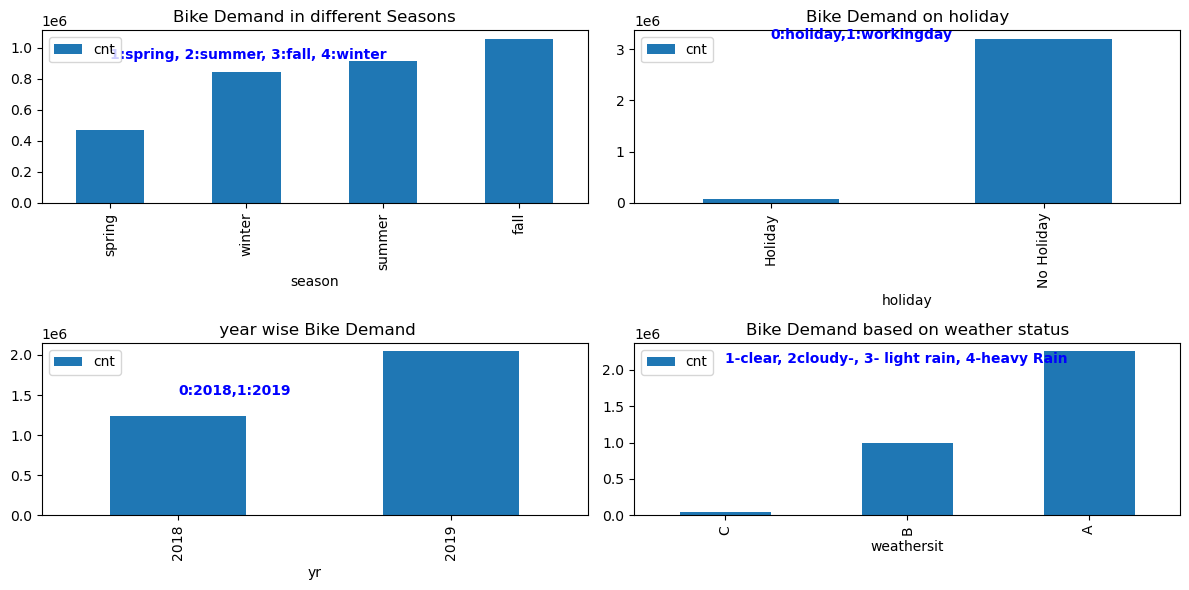

In [65]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(2,2, 1, title="Bike Demand in different Seasons")
ax2 = fig.add_subplot(2,2, 2, title="Bike Demand on holiday")
ax3 = fig.add_subplot(2,2, 3, title=" year wise Bike Demand")
ax4 = fig.add_subplot(2,2, 4, title="Bike Demand based on weather status")
BS_day.groupby('season').sum().sort_values('cnt')[['cnt']].plot.bar(ax=ax1)
BS_day.groupby('holiday').sum().sort_values('cnt')[['cnt']].plot.bar(ax=ax2)
BS_day.groupby('yr').sum().sort_values('cnt')[['cnt']].plot.bar(ax=ax3)
BS_day.groupby('weathersit').sum().sort_values('cnt')[['cnt']].plot.bar(ax=ax4)
ax1.text(0,930000, '1:spring, 2:summer, 3:fall, 4:winter', color='blue', fontweight='bold')
ax2.text(0,3200000, '0:holiday,1:workingday', color='blue', fontweight='bold')
ax3.text(0,1500000, '0:2018,1:2019', color='blue', fontweight='bold')
ax4.text(0,2100000, '1-clear, 2cloudy-, 3- light rain, 4-heavy Rain', color='blue', fontweight='bold')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


In [60]:
#removing atemp as it is highly correlated with temp
BS_day.drop('atemp',axis=1,inplace=True)    

## 3. Data Preparation 


#### Data Preparation

prepare the data and build the model.

#### ( Data Description)

- season (1:spring, 2:summer, 3:fall, 4:winter)
- year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		-1: Clear, Few clouds, Partly cloudy, Partly cloudy
		-2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		-3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		-4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [66]:
# Subset all categorical variables
BS_day_categorical=BS_day.select_dtypes(include=['object'])

In [67]:
# Convert into dummies
BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first=True)
BS_day_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_workingday,weathersit_B,weathersit_C
0,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [68]:
# Drop categorical variable columns
BS_day = BS_day.drop(list(BS_day_categorical.columns), axis=1)

In [69]:
# Concatenate dummy variables with the original dataframe
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [70]:
# Let's check the first few rows
BS_day.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_workingday,weathersit_B,weathersit_C
0,1,2018-01-01,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,0,...,1,1,0,0,0,0,0,1,1,0
1,2,2018-02-01,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,0,...,1,0,0,0,0,1,0,1,1,0
2,3,2018-03-01,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,4,2018-04-01,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,5,2018-05-01,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day=BS_day.drop(['instant','dteday'], axis = 1, inplace = False)
BS_day.head()

,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,yr_2019,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_workingday,weathersit_B,weathersit_C
0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,0,0,0,...,1,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 4. Model Building and Evaluation

Test and Train split



In [73]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
df_train

,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,yr_2019,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_workingday,weathersit_B,weathersit_C
653,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
576,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
426,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,0,0,1,...,1,1,0,0,0,0,0,1,1,0
728,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
482,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,1,0,1,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
578,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
53,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
350,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0


### Scaling

we need to scale the variables for better interpretability.The scaling has to be done only on the train dataset because nothing is required to be learnt in testing 

In [75]:
from sklearn.preprocessing import MinMaxScaler 

In [76]:
scaler = MinMaxScaler()

In [77]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [78]:
df_train

,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,yr_2019,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_workingday,weathersit_B,weathersit_C
653,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
576,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
426,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,1,...,1,1,0,0,0,0,0,1,1,0
728,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
482,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,1,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
578,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
53,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
350,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0


In [79]:
df_train.describe()

,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,yr_2019,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_workingday,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,0.245098,0.24902,0.507843,...,0.974510,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.323529,0.343137,0.029412
std,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,0.430568,0.43287,0.500429,...,0.157763,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.468282,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.00000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,0.000000,0.00000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


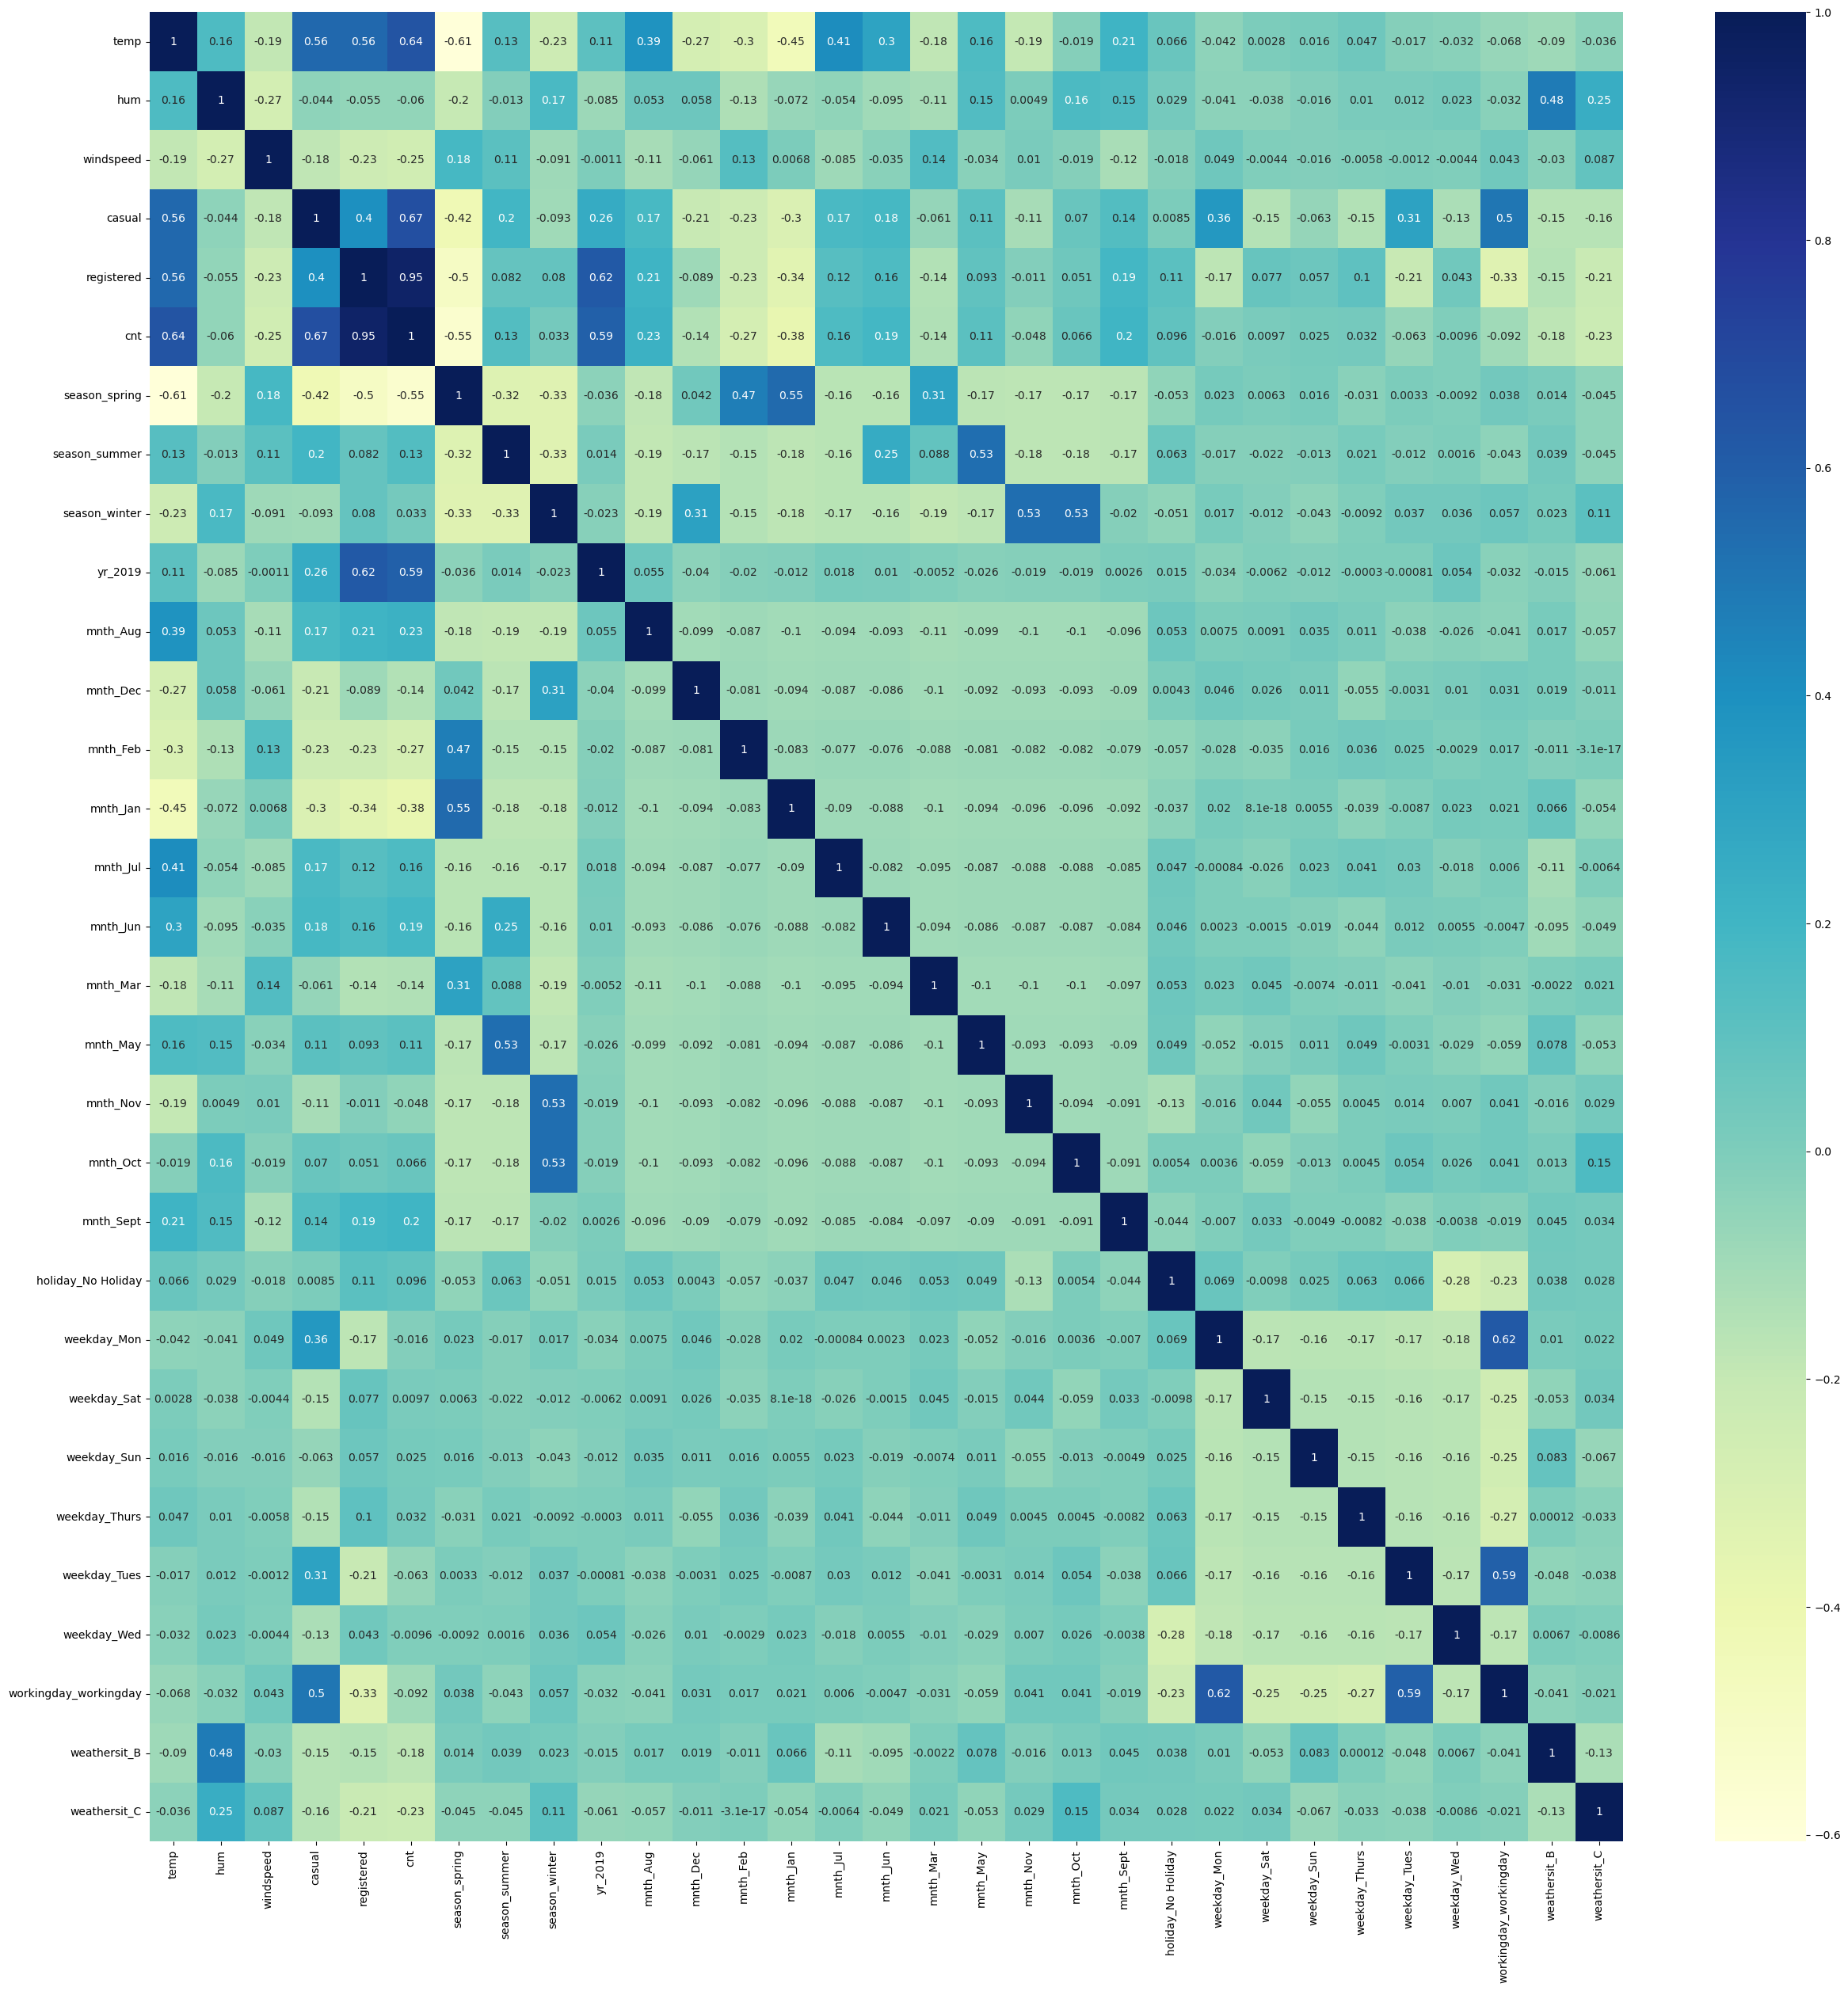

In [80]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

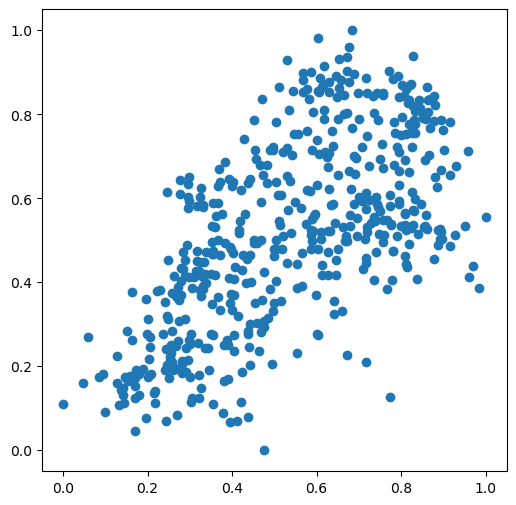

In [81]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [82]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [83]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_workingday,weathersit_B,weathersit_C
653,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,1,0
728,0.245101,0.498067,0.663106,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,1,1,0


In [84]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[0.50988653, 0.57535369, 0.30079362, ..., 0.        , 0.        ,
        0.        ],
       [0.81516855, 0.72563341, 0.26468552, ..., 0.        , 0.        ,
        0.        ],
       [0.44239303, 0.6401887 , 0.25534248, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.2026183 , 0.4359394 , 0.11137874, ..., 0.        , 0.        ,
        0.        ],
       [0.24821622, 0.5779299 , 0.43181554, ..., 1.        , 1.        ,
        0.        ],
       [0.46266376, 0.75987024, 0.52988098, ..., 0.        , 1.        ,
        0.        ]])

In [85]:
X_train.shape

(510, 28)

### Building the first model with all the features



In [86]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                    0.226060
temp                     0.450562
hum                     -0.151340
windspeed               -0.186453
season_spring           -0.048159
season_summer            0.038725
season_winter            0.105847
yr_2019                  0.232116
mnth_Aug                 0.014404
mnth_Dec                -0.045586
mnth_Feb                -0.032282
mnth_Jan                -0.062777
mnth_Jul                -0.040350
mnth_Jun                -0.002972
mnth_Mar                 0.001045
mnth_May                 0.023940
mnth_Nov                -0.041851
mnth_Oct                 0.007534
mnth_Sept                0.081060
holiday_No Holiday       0.110521
weekday_Mon             -0.018704
weekday_Sat             -0.003849
weekday_Sun              0.005388
weekday_Thurs           -0.013502
weekday_Tues            -0.073239
weekday_Wed             -0.015519
workingday_workingday    0.023596
weathersit_B            -0.061066
weathersit_C            -0.257443
dtype: float64

In [89]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [91]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.45056169 -0.15134004 -0.18645332 -0.04815901  0.03872462  0.10584692
  0.23211572  0.01440398 -0.0455859  -0.03228181 -0.06277659 -0.04035007
 -0.00297239  0.00104515  0.02393995 -0.04185131  0.00753359  0.0810599
  0.05400605  0.03781128 -0.00384924  0.00538751 -0.01350234 -0.01672432
 -0.01551922 -0.03291909 -0.0610664  -0.25744279]
0.2825749145784947


In [92]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          8.74e-182
Time:                        15:41:08   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2261      0.041      5.573      0.000       0.146       0.306
temp                      0.4506      0.046      9.734      0.000       0.360       0.542
hum                      -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring            -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer             0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter             0.1058      0.028      3.794      0.000       0.051       0.161
yr_2019                   0.2321      0.008     28.820      0.000       0.216       0.248
mnth_Aug                  0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                 -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                 -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                 -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul                 -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun                 -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                  0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                  0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                 -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                  0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept                 0.0811      0.032      2.533      0.012       0.018       0.144
holiday_No Holiday        0.1105      0.018      6.083      0.000       0.075       0.146
weekday_Mon              -0.0187      0.018     -1.030      0.303      -0.054       0.017
weekday_Sat              -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun               0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs            -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues             -0.0732      0.018     -4.019      0.000      -0.109      -0.037
weekday_Wed              -0.0155      0.015     -1.064      0.288      -0.044       0.013
workingday_workingday     0.0236      0.014      1.645      0.101      -0.005       0.052
weathersit_B             -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C             -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarqu

 Adjusted R-squared value of **84.5%** , R-squared value is **85.3%**

In [112]:
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# RFE with 15 features
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True False False False  True  True
 False False False False False  True  True  True False False False False
 False  True  True  True]
[ 1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1  1 12 11  9  7
  8  1  1  1]


#### Model Building and Evaluation 

 model using `statsmodels`.

In [113]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Jan,mnth_Jul,mnth_Sept,holiday_No Holiday,weekday_Mon,workingday_workingday,weathersit_B,weathersit_C
653,1.0,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,1,0,0,0,0
576,1.0,0.815169,0.725633,0.264686,0,0,0,1,0,1,0,1,0,0,0,0
426,1.0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,1,1,1,1,0
728,1.0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,1,0,1,0,0
482,1.0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,1,1,1,1,0


In [114]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.31e-191
Time:                        15:53:35   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

 R-squared: is **84.9%**
Adjusted R-squared is **84.4%**

In [115]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
a=X_train_rfe1.drop('const',axis=1)

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,33.74
10,holiday_No Holiday,28.58
0,temp,20.13
3,season_spring,5.15
2,windspeed,4.98
5,season_winter,3.85
4,season_summer,3.06
12,workingday_workingday,2.63
13,weathersit_B,2.33
6,yr_2019,2.10


In [121]:
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)


# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True False False  True False False False False  True
 False False False False False False False False False False False False
 False False False  True]
[ 1  1  1  1  6  3  1 14 11 12  9  1 21 22 13 10 18  4  2  7 20 19 17 15
 16  8  5  1]


In [122]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,temp,hum,windspeed,season_spring,yr_2019,mnth_Jul,weathersit_C
653,1.0,0.509887,0.575354,0.300794,0,1,0,0
576,1.0,0.815169,0.725633,0.264686,0,1,1,0
426,1.0,0.442393,0.640189,0.255342,1,1,0,0
728,1.0,0.245101,0.498067,0.663106,1,1,0,0
482,1.0,0.395666,0.504508,0.188475,0,1,0,0


In [123]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.34e-178
Time:                        15:56:30   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348

R squared value is **81.3%** and Adjusted R squared value is **81.1%**

In [124]:
b=X_train_rfe2.drop('const',axis=1)

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,10.47
0,temp,10.37
2,windspeed,3.89
4,yr_2019,2.03
3,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_C,1.11


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

 remove 'hum' first having the maximum VIF and then check for it again.

In [126]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,temp,windspeed,season_spring,yr_2019,mnth_Jul,weathersit_C
653,1.0,0.509887,0.300794,0,1,0,0
576,1.0,0.815169,0.264686,0,1,1,0
426,1.0,0.442393,0.255342,1,1,0,0
728,1.0,0.245101,0.663106,1,1,0,0
482,1.0,0.395666,0.188475,0,1,0,0
...,...,...,...,...,...,...,...
526,1.0,0.824514,0.355596,0,1,0,0
578,1.0,0.863973,0.187140,0,1,0,0
53,1.0,0.202618,0.111379,1,0,0,0
350,1.0,0.248216,0.431816,0,0,0,0


In [127]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.37e-168
Time:                        15:58:21   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.020     12.986

 R- squared is  **79.3%** and the adjusted r - squared is **79.1%**

In [128]:
c=X_train_rfe2.drop('const',axis=1)

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.95
1,windspeed,3.72
3,yr_2019,2.03
2,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_C,1.04


All the VIF values and p-values seem to be in the permissible range now.

### Residual Analysis



In [130]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

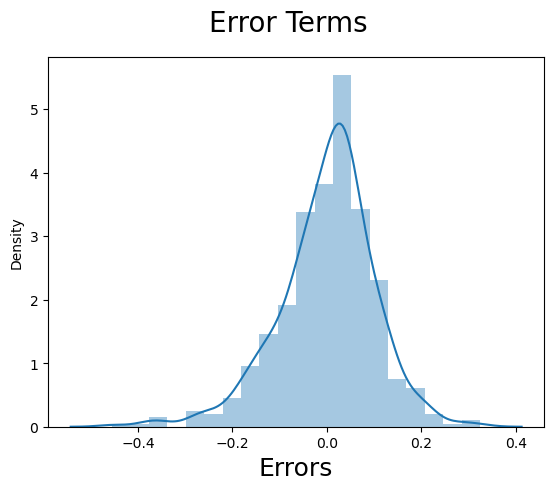

In [131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

The error terms are fairly normally distributed 

### Making Predictions



In [132]:
X_train_rfe2

,const,temp,windspeed,season_spring,yr_2019,mnth_Jul,weathersit_C
653,1.0,0.509887,0.300794,0,1,0,0
576,1.0,0.815169,0.264686,0,1,1,0
426,1.0,0.442393,0.255342,1,1,0,0
728,1.0,0.245101,0.663106,1,1,0,0
482,1.0,0.395666,0.188475,0,1,0,0
...,...,...,...,...,...,...,...
526,1.0,0.824514,0.355596,0,1,0,0
578,1.0,0.863973,0.187140,0,1,0,0
53,1.0,0.202618,0.111379,1,0,0,0
350,1.0,0.248216,0.431816,0,0,0,0


In [133]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [134]:
df_test[var] = scaler.transform(df_test[var])

In [135]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [136]:
X_test.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_workingday,weathersit_B,weathersit_C
184,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
535,0.901354,0.610133,0.153728,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
299,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
221,0.881625,0.437098,0.339570,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
152,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [137]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['temp', 'windspeed', 'season_spring', 'yr_2019', 'mnth_Jul',
       'weathersit_C'],
      dtype='object')

In [138]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [139]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   temp           219 non-null    float64
 2   windspeed      219 non-null    float64
 3   season_spring  219 non-null    uint8  
 4   yr_2019        219 non-null    uint8  
 5   mnth_Jul       219 non-null    uint8  
 6   weathersit_C   219 non-null    uint8  
dtypes: float64(3), uint8(4)
memory usage: 7.7 KB


In [140]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

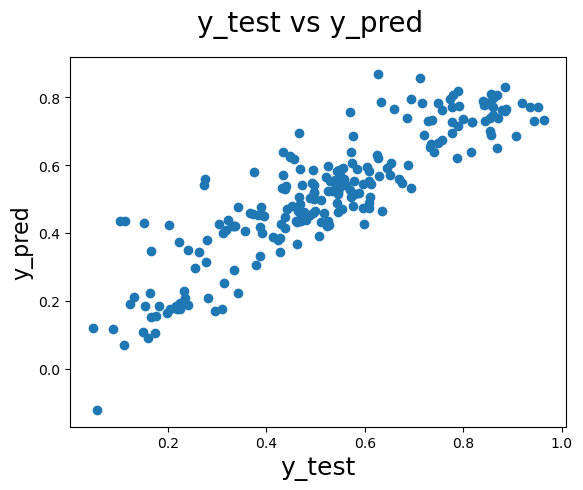

In [141]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well.

In [142]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228018

 the r-squared on test data is about 78.02% . 

#### Checking the correlations between the final predictor variables

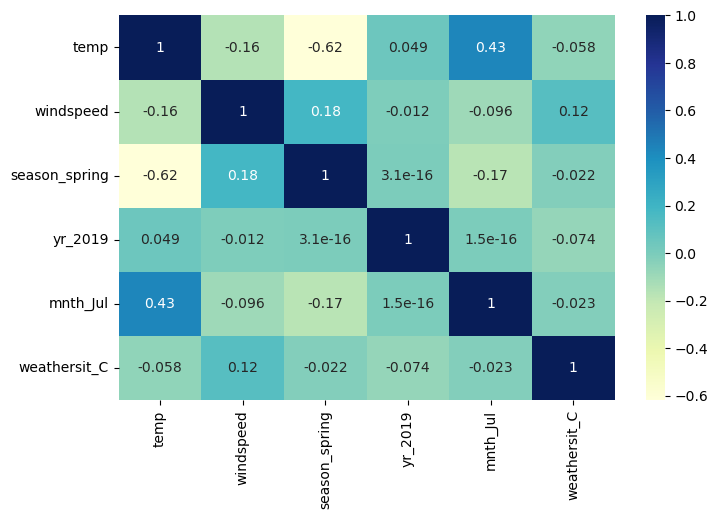

In [143]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(BS_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()


The final predictors have fairly low correlations. 
The final model consists of the 6 variables mentioned above.
One can go ahead with this model and use it for predicting count of daily bike rentals.

